# Steam Data Architecture

In [1]:
import pandas as pd
import numpy as np

In [2]:
steamspy_df = pd.read_csv('steamspy_data.csv')
steamspy_df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,NaN,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,NaN,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."


Or we can do steamspy_df = pd.read_csv('steamspy_data.csv', low_memory=False)

In [3]:
# Basic exploration
steamspy_df.shape

(29235, 20)

In [4]:
steamspy_df.columns.tolist()
steamspy_df.dtypes

appid                int64
name                object
developer           object
publisher           object
score_rank         float64
positive             int64
negative             int64
userscore            int64
owners              object
average_forever      int64
average_2weeks       int64
median_forever       int64
median_2weeks        int64
price              float64
initialprice       float64
discount           float64
languages           object
genre               object
ccu                  int64
tags                object
dtype: object

In [5]:
steamspy_df.describe(include='all')

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
count,2.923500e+04,29230,29037,28939,58.000000,2.923500e+04,29235.000000,29235.000000,29235,29235.000000,29235.000000,29235.000000,29235.000000,29206.000000,29213.000000,29213.000000,29141,29083,29235.000000,29235
unique,NaN,29157,18208,15197,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4446,1624,NaN,24675
top,NaN,Fruit Sudoku,Choice of Games,Big Fish Games,NaN,NaN,NaN,NaN,"0 .. 20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,"Action, Indie",NaN,[]
freq,NaN,4,95,231,NaN,NaN,NaN,NaN,20234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16330,1971,NaN,656
mean,5.937432e+05,NaN,NaN,NaN,97.034483,9.654789e+02,205.846725,0.148863,NaN,148.133846,7.162579,145.004652,7.732581,777.811374,803.995755,2.832027,NaN,NaN,140.956833,NaN
std,2.528262e+05,NaN,NaN,NaN,2.034488,1.829885e+04,4132.388985,3.439954,NaN,1913.429438,113.653011,2389.469023,124.511022,1135.277801,1169.816585,13.353006,NaN,NaN,6894.578948,NaN
min,1.000000e+01,NaN,NaN,NaN,93.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,3.979200e+05,NaN,NaN,NaN,96.000000,6.000000e+00,2.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,199.000000,199.000000,0.000000,NaN,NaN,0.000000,NaN
50%,5.982400e+05,NaN,NaN,NaN,97.000000,2.300000e+01,8.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,499.000000,499.000000,0.000000,NaN,NaN,0.000000,NaN
75%,7.973700e+05,NaN,NaN,NaN,98.750000,1.200000e+02,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,999.000000,999.000000,0.000000,NaN,NaN,0.000000,NaN


In [6]:
steamspy_df.isnull().sum()

appid                  0
name                   5
developer            198
publisher            296
score_rank         29177
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                 29
initialprice          22
discount              22
languages             94
genre                152
ccu                    0
tags                   0
dtype: int64

Most of the data in score_rank is null. It does not hold relevance with other columns. We shall delete it. Also, there is inconsistency in the datatype of columns. We will fix that.

In [7]:
# Drop score_rank
steamspy_df = steamspy_df.drop(columns=['score_rank'])

# Rectify data types
dtype_mapping = {
    'appid': 'Int64',
    'name': 'string',
    'developer': 'string',
    'publisher': 'string',
    'positive': 'Int64',
    'negative': 'Int64',
    'userscore': 'float64',
    'owners': 'string',
    'average_forever': 'Int64',
    'average_2weeks': 'Int64',
    'median_forever': 'Int64',
    'median_2weeks': 'Int64',
    'price': 'float64',
    'initialprice': 'float64',
    'discount': 'Int64',
    'languages': 'string',
    'genre': 'string',
    'ccu': 'Int64',
    'tags': 'string'
}

steamspy_df = steamspy_df.astype(dtype_mapping)

In [8]:
missing_name_rows = steamspy_df[steamspy_df['name'].isnull()]
missing_name_rows

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
481,17760,<NA>,<NA>,<NA>,0,0,0.0,"0 .. 20,000",0,0,0,0,0.0,0.0,0,<NA>,<NA>,0,[]
7235,396420,<NA>,<NA>,<NA>,22,9,0.0,"20,000 .. 50,000",0,0,0,0,0.0,0.0,0,<NA>,<NA>,0,"{'Free to Play': 24, 'Action': 21, 'Indie': 21..."
9553,460250,<NA>,Jeroen Wimmers,Jeroen Wimmers,44,4,0.0,"0 .. 20,000",0,0,0,0,899.0,899.0,0,"English, French, Italian, German, Spanish - Sp...","Casual, Indie",0,"{'Indie': 34, 'Casual': 24, 'Puzzle': 15, 'Min..."
22244,806160,<NA>,Paleno Games,Paleno Games,4,13,0.0,"0 .. 20,000",0,0,0,0,99.0,99.0,0,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Casual, Indie",0,"{'Action': 22, 'Indie': 22, 'Casual': 21, 'Adv..."
27324,965340,<NA>,2nd Studio,2nd Studio,31,1,0.0,"0 .. 20,000",0,0,0,0,199.0,199.0,0,"English, German, Danish, Japanese, Russian, Si...","Action, Indie, Simulation",0,"{'Indie': 32, 'Sexual Content': 31, 'Action': ..."


In [9]:
# Drop rows where 'name' is missing
steamspy_df = steamspy_df.dropna(subset=['name'])

In [10]:
num_unique_appids = steamspy_df['appid'].nunique()
num_unique_appids

29230

The total number of records is also 29230. Hence, the appid is unique and should be assigned as the primary key.

In [11]:
steamspy_df = steamspy_df.set_index('appid')

We also have 198 records where the values for developers is null. We want to fill "Unknown Developers" instead of the null values.

In [12]:
steamspy_df['developer'] = steamspy_df['developer'].fillna('Unknown Developer')

# Confirming that no missing developers remain
print(f"Missing developers remaining: {steamspy_df['developer'].isnull().sum()}")

Missing developers remaining: 0


We will perform similar operations on publisher and other fields where there are null values. 

Note: We will fill the null values for price, initial price and discount with -1 instead of 0. This is because 0 can be misleading. Having the price of 0 might mean it is free and not unknown value. 

In [13]:
steamspy_df['publisher'] = steamspy_df['publisher'].fillna('Unknown Publisher')
steamspy_df['price'] = steamspy_df['price'].fillna(-1.0)
steamspy_df['initialprice'] = steamspy_df['initialprice'].fillna(-1.0)
steamspy_df['discount'] = steamspy_df['discount'].fillna(-1).astype('Int64')
steamspy_df['languages'] = steamspy_df['languages'].fillna('Unknown')
steamspy_df['genre'] = steamspy_df['genre'].fillna('Unknown')

#Checking if there is still any null values
steamspy_df.isnull().sum()

name               0
developer          0
publisher          0
positive           0
negative           0
userscore          0
owners             0
average_forever    0
average_2weeks     0
median_forever     0
median_2weeks      0
price              0
initialprice       0
discount           0
languages          0
genre              0
ccu                0
tags               0
dtype: int64

**Side Note:**  
We could have used more advanced machine learning techniques (such as Random Forest regressors or classifiers) to predict and impute missing values for certain columns (e.g. price, languages, genre, publisher). However, in this case:
- The number of missing values was relatively low compared to the size of the entire dataset.
- The primary focus of this project is not on optimizing imputation strategies.
- Simpler, consistent default values (e.g. 'Unknown', -1) are sufficient for our relational modeling and downstream analysis.

Therefore, we chose not to pursue more complex imputation approaches in this workflow.

Now, for the further steps, we want to create another dataframe where we take a copy of the columns appid and languages out of the streamspy_df and then work on it. We plan to create two datasets: languages{language_id, language_name} and game_languages{appid, language_id}. 

Here, the game_languages is acting as a junction table. Why do we need a junction table? Refer to: https://eng.libretexts.org/Courses/Delta_College/Introduction_to_Database_Systems/07%3A_Mapping_ER_to_Schema_Normalization/7.03%3A_Define_first_(1NF)_second_(2NF)_and_third_normal_(3NF)_form#:~:text=Since%20the%20second%20normal%20form,conjoined%20to%20represent%20each%20other.

In [14]:
# Copying the columns
languages_df = steamspy_df.reset_index()[['appid', 'languages']].copy()
# Note: Here we cannot treat 'appid' as a column anymore. We have assigned it as an index. Technically, it is possible to use reset_index() function but this is a simple way out.

# For the column, the delimeter is ",". So we will spit using it. 
languages_df['languages'] = languages_df['languages'].str.split(r',|\n|<br>|;')
languages_df

,appid,languages
0,10,"[English, French, German, Italian, Spanish..."
1,20,"[English, French, German, Italian, Spanish..."
2,30,"[English, French, German, Italian, Spanish..."
3,40,"[English, French, German, Italian, Spanish..."
4,50,"[English, French, German, Korean]"
...,...,...
29225,1065230,"[English, Japanese, Simplified Chinese, Tra..."
29226,1065570,[English]
29227,1065650,[English]
29228,1066700,"[English, German, Korean, Russian]"


Note: Until now, we have only splitted the string "English, French, German" into a list: ['English', 'French', 'German']


**An Amazing Function :- df.explode()**
Here, we have an opportunity to use this amazing function. It will split the list consisting of languages into individual rows for each column.

In [15]:
# Exploding the dataframe into one row per (appid, language)
languages_df = languages_df.explode('languages')

# This will remove the extra whitespace.
languages_df['languages'] = languages_df['languages'].astype(str).str.strip()

# Remove empty / nan rows
languages_df = languages_df[languages_df['languages'].notnull()]
languages_df = languages_df[languages_df['languages'] != '']
languages_df = languages_df[languages_df['languages'].str.lower() != 'nan']

# Lets have a look at the df
languages_df

,appid,languages
0,10,English
0,10,French
0,10,German
0,10,Italian
0,10,Spanish - Spain
...,...,...
29229,1069460,German
29229,1069460,Spanish - Spain
29229,1069460,Portuguese - Brazil
29229,1069460,Dutch


In [16]:
# In our new temp df, we will extract all the unique languages from languages_df 
unique_languages = pd.DataFrame(languages_df['languages'].unique(), columns=['language_name'])

unique_languages

,language_name
0,English
1,French
2,German
3,Italian
4,Spanish - Spain
5,Simplified Chinese
6,Traditional Chinese
7,Korean
8,Russian
9,Dutch


There is still a lot of unwanted values. We shall clean them up before indexing the languages. For doing this, we will need to hard code the cleanup code for some particular values such as "audio", "support", "supported" etc. 

In [17]:
# We will also replace the non-language labels with ""
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'#lang_', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'#lang_full_audio', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'#lang_fullsubtitles', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'\r|\n', ' ', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'\[.*?\]', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'\*\*|\*|<br>|;', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.strip()

# Cleanup again after removing the unwanted special chars
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'\s+', ' ', regex=True).str.strip()
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'full_audio', '', regex=True)
unique_languages['language_name'] = unique_languages['language_name'].str.replace(r'fullsubtitles', '', regex=True)
unique_languages = unique_languages.drop_duplicates(subset=['language_name']).reset_index(drop=True)

# Filtering out common non-language labels
non_language_labels = [
    'Interface', 'full', 'subtitles', 'Full Audio', 'Full Subtitles', 'Not supported', 'text', 'only', 'all', 'with'
]

# Here, we cannot use the usual isin(), but we need to use .contains as it might not sort values such as "Russian English Spanish - Spain French Japanese text only"
non_language_pattern = r'\b(?:' + '|'.join(non_language_labels) + r')\b'
unique_languages = unique_languages[~unique_languages['language_name'].str.contains(non_language_pattern, case=False, regex=True)]

# Sorting and making sure that the index value starts from 1 and not 0
unique_languages = unique_languages.sort_values('language_name').reset_index(drop=True)
unique_languages['language_id'] = unique_languages.index + 1

display(unique_languages)

,language_name,language_id
0,,1
1,Arabic,2
2,Bulgarian,3
3,Czech,4
4,Danish,5
5,Dutch,6
6,English,7
7,English Dutch English,8
8,Finnish,9
9,French,10


We still see problems. Record 7 states "English Dutch English". This is not wanted. We can maybe set up a for loop in which if the same word is found in the same row, it shall eliminate the firstly found word. We will fix this later. Record 5 and 35 are "English" and "english". This should not exist. We can fix still in multiple ways. Firstly, we can lowercase all and check if they are equal. If the value is true, we can remove one of them. Secondly, we can title-case capitalize for each word and then remove the duplicate. For ex: "english latin" witll become "English Latin". For now, we will go with the latter. 

In [18]:
# Capitalizing the first letter of each word
unique_languages['language_name'] = unique_languages['language_name'].str.title()

# Removing the duplicates
unique_languages = unique_languages.drop_duplicates(subset=['language_name']).reset_index(drop=True)

# Reassigning the indexes
unique_languages['language_id'] = unique_languages.index + 1

display(unique_languages)

,language_name,language_id
0,,1
1,Arabic,2
2,Bulgarian,3
3,Czech,4
4,Danish,5
5,Dutch,6
6,English,7
7,English Dutch English,8
8,Finnish,9
9,French,10


We successfully eliminated the problem of redundancy by capitalizing. There is still some scope of improvement such as for record 7. We will fix it later. We will for now set the language_id column as the index and we have our Language table ready. 

In [20]:
Language = unique_languages.set_index('language_id')
display(Language)

,language_name
language_id,
1,Arabic
2,Bulgarian
3,Czech
4,Danish
5,Dutch
6,English
7,English Dutch English
8,Finnish
9,Français


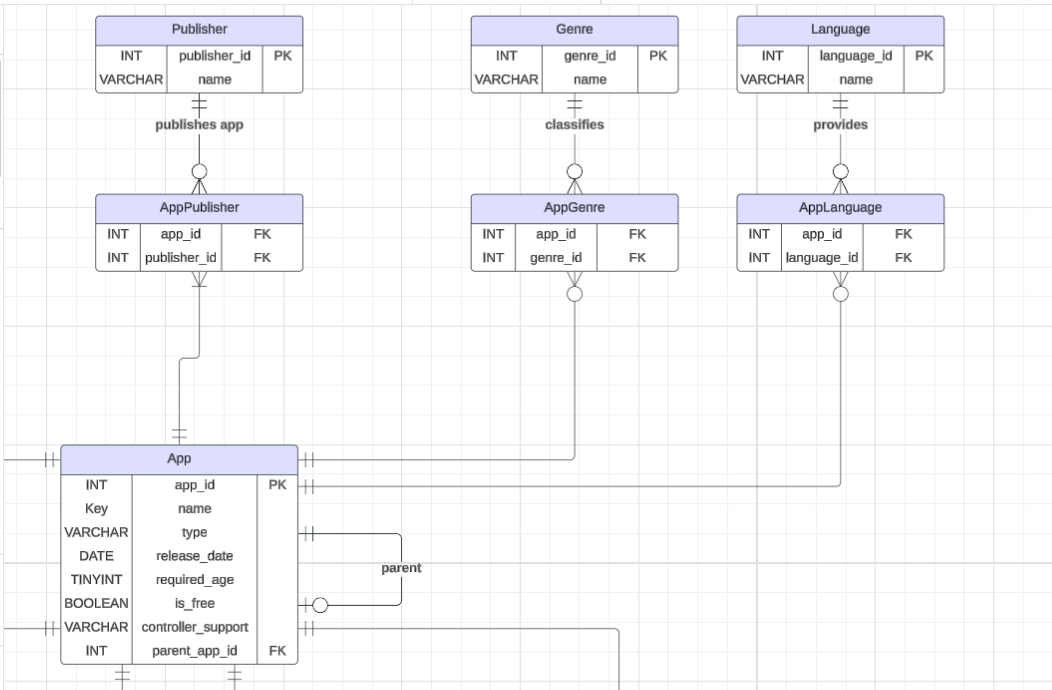

##### Creating the `AppLanguage` Table Now that we have successfully created the `Language` table, it's time to construct the `AppLanguage` junction table — and this part will be quite the adventure! The goal is to map each `app_id` to the languages it supports, using the cleaned and structured `Language` table. However, the `languages` column in the `steamspy_df` dataset is a bit tricky. It contains strings like: ``` English, French, German, Italian, Spanish - Spain, Simplified Chinese, Traditional Chinese, Korean ``` This means we can't directly match rows — we need to search each language name inside these comma-separated strings. To accomplish this, we'll use a **nested for-in loop**: - Loop through each row in `steamspy_df` - For each app, check whether any of the language names from our `Language` table appear in the `languages` string - If there's a match, we record the `app_id` and corresponding `language_id` This will allow us to construct a clean and relational `AppLanguage` table with two columns: - `app_id` - `language_id` Let’s dive in and make this happen!

In [23]:
app_language_rows = []

for app_id, row in steamspy_df.iterrows():
    lang_string = str(row['languages']).lower() # To change the form of list of languages so that we can iterate over it

    for language_id, language_name in Language['language_name'].items():
        if language_name.lower() in lang_string:
            app_language_rows.append({
                'appid':       app_id,
                'language_id': language_id
            })

# 4. Build and dedupe the DataFrame
AppLanguage = (
    pd.DataFrame(app_language_rows)
      .drop_duplicates()
      .reset_index(drop=True)
)

display(AppLanguage)

,appid,language_id
0,10,6
1,10,10
2,10,11
3,10,14
4,10,16
...,...,...
104710,1069460,19
104711,1069460,20
104712,1069460,22
104713,1069460,25


In [35]:
# 1) Raw “languages” for appid 10 (using the index)
raw_lang_10 = steamspy_df.loc[10, 'languages']
print("steamspy_df.languages for appid 10:\n", raw_lang_10, "\n")

# 2) All rows in AppLanguage for appid 10
app_lang_10 = AppLanguage[AppLanguage['appid'] == 10]
print("AppLanguage entries for appid 10:")
display(app_lang_10)

# 3) (Optional) Look up the human names of those language_ids
lang_names_10 = Language.loc[app_lang_10['language_id'], 'language_name'].tolist()
print("Mapped language names for appid 10:\n", lang_names_10)

steamspy_df.languages for appid 10:
 English, French, German, Italian, Spanish - Spain, Simplified Chinese, Traditional Chinese, Korean 

AppLanguage entries for appid 10:


,appid,language_id
0,10,6
1,10,10
2,10,11
3,10,14
4,10,16
5,10,23
6,10,25
7,10,27
8,10,30


Mapped language names for appid 10:
 ['English', 'French', 'German', 'Italian', 'Korean', 'Simplified Chinese', 'Spanish', 'Spanish - Spain', 'Traditional Chinese']


This looks good. Because Spanish is a part of Spain, we need not worry. We have designed our code to only take in the former langugae(Here Spanish) and not the latter version(Here Spain) as a new record in Languages table. We now have done everything we wanted for the language portion in terms of our project. 